In [108]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from cv_utils import *
from loss_utils import get_loss

In [109]:
def invert_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary mask
    _, mask = cv2.threshold(gray, 251, 255, cv2.THRESH_BINARY)
    
    # Invert the binary mask
    mask = cv2.bitwise_not(mask)
    inverted_image = cv2.bitwise_and(image, image, mask=mask)
    return inverted_image

def invert_image_green(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary mask
    _, mask = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)     #251
    
    # Invert the binary mask
    inverted_mask = cv2.bitwise_not(mask)
    
    # Create a green color mask
    green_mask = np.zeros_like(image)
    green_mask[:, :, 1] = 255  # Set the green channel to 255 (full intensity)
    
    # Combine the green mask with the inverted mask
    inverted_image = cv2.bitwise_and(green_mask, green_mask, mask=~inverted_mask)
    #plt.imshow(inverted_image)
    
    # Add the inverted image to the original image
    #result_image = cv2.add(image, inverted_image)
    
    #return result_image
    return inverted_image




def invert_image_green(image, color = 1, intensity = 255):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary mask
    _, mask = cv2.threshold(gray, 251, 255, cv2.THRESH_BINARY_INV)
    
    # Create a green color mask
    green_mask = np.zeros_like(image)
    green_mask[:, :, color] = intensity
    
    # Keep the object area unchanged
    result_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Combine the green mask with the inverted mask for the non-object area
    result_image += cv2.bitwise_and(green_mask, green_mask, mask=~mask)
    
    return result_image

((1920, 1920, 3), (1920, 1920, 3))

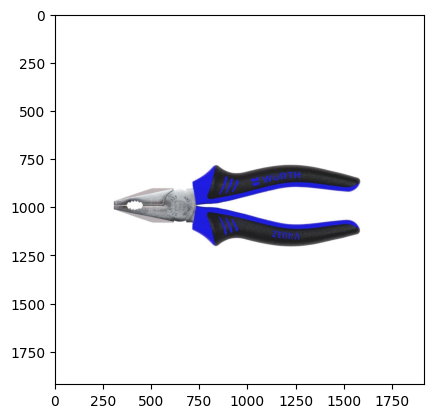

In [110]:
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\labelled_dataset\6020021201\6020021201.webp"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_110.jpg"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_0.jpg"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_240.jpg"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_220.jpg"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_310.jpg"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\google_dataset\img08.jpg"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\test_set\classes\141874\141874.jpg"
folder = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\generated_datasets\diffusion_models\to_use\masks"

#template = cv2.resize(cv2.imread(image_path, 0), (0, 0), fx=0.8, fy=0.8)
img= cv2.imread(image_path)
image = cv2.imread(image_path)
img= invert_image(img)
img= remove_noise(img)
#template = cv2.resize(template, (224, 224))
h, w, c = img.shape
plt.imshow(image)
img.shape, img.shape

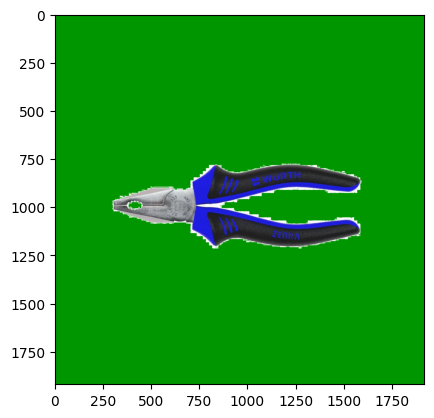

In [111]:
image[np.where(np.all(image == [255, 255, 255], axis=-1))] = [0, 150, 0]
plt.imshow(image)

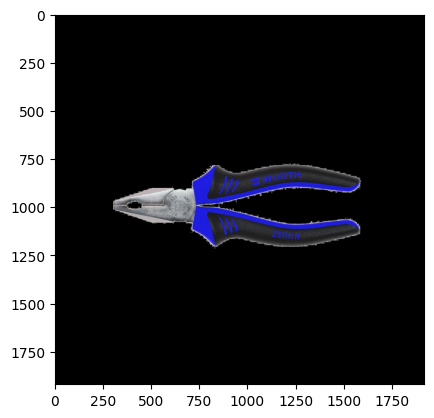

In [112]:
plt.imshow(img)

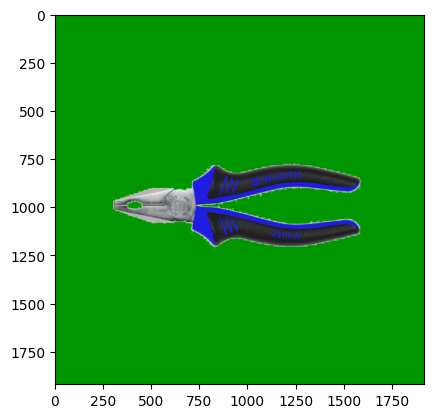

In [113]:
green = invert_image_green(image, 1, 150)
plt.imshow(green)

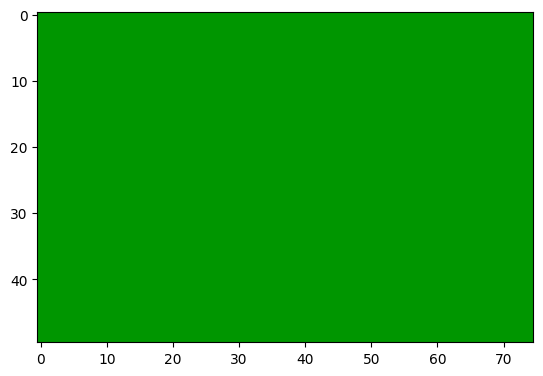

In [114]:
plt.imshow(green[650:700, 375:450])

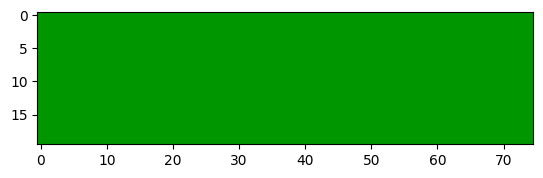

In [115]:
plt.imshow(green[660:680, 375:450])

In [116]:
green[660:680, 375:450][0][:10]

array([[  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0]], dtype=uint8)

In [117]:
image[660:680, 375:450][0][:10]

array([[  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0],
       [  0, 150,   0]], dtype=uint8)

(0.0, (1920, 1920), <matplotlib.image.AxesImage at 0x12db9adb5b0>)

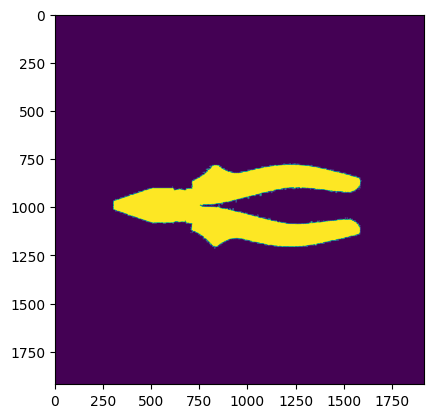

In [118]:
def find_object_mask(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to convert image to binary
    _, binary_image = cv2.threshold(gray_image, 80, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    max_contour = max(contours, key=cv2.contourArea)
    
    # Create an empty mask
    mask = np.zeros_like(gray_image)
    
    # Draw contours on the mask
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
    #cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=2)

    rotated_rect = cv2.minAreaRect(max_contour)
    angle = rotated_rect[-1]
    
    return (angle - 90), mask

angle, mask = find_object_mask(img)
angle, mask.shape, plt.imshow(mask)

(0.0, (1920, 1920), <matplotlib.image.AxesImage at 0x12dab6e3670>)

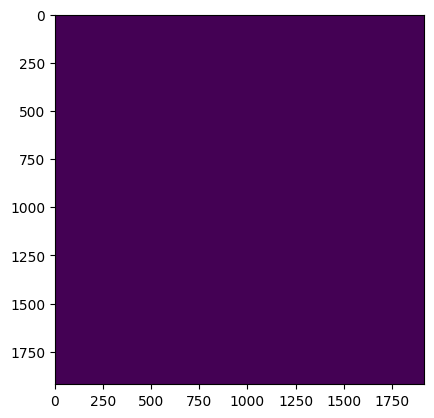

In [119]:
angle, mask = find_object_mask(green)
angle, mask.shape, plt.imshow(mask)

In [91]:
mask[660:680, 375:450][0][:10]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255], dtype=uint8)

In [16]:
indices = np.where(image == [0, 150, 0])
np.sum(indices)

10315700150

In [17]:
np.where(np.all(green == [0, 150, 0], axis=-1))

(array([   0,    0,    0, ..., 1279, 1279, 1279], dtype=int64),
 array([   0,    1,    2, ..., 1917, 1918, 1919], dtype=int64))

In [18]:
unique_values = np.unique(image.reshape(-1, image.shape[2]), axis=0)
print("Unique pixel values in the image:", unique_values)

Unique pixel values in the image: [[  0   8  15]
 [  0 150   0]
 [  4  11  20]
 ...
 [255 255 251]
 [255 255 252]
 [255 255 254]]


In [19]:
image[image == [0, 150, 0]]

array([  0, 150,   0, ...,   0, 150,   0], dtype=uint8)

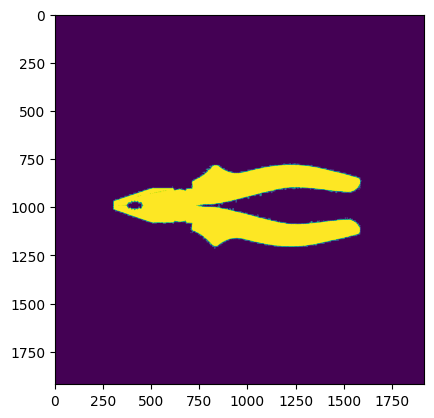

In [120]:
def exclude_green_pixels(image, mask):
    # Find the indices where the pixel value is [0, 150, 0]
    green_indices = np.where(np.all(image == [0, 150, 0], axis=-1))
    #print(green_indices)

    # Set the mask value to 0 at those indices
    mask[green_indices] = 0

    return mask

new_mask = exclude_green_pixels(green, mask)
plt.imshow(new_mask)

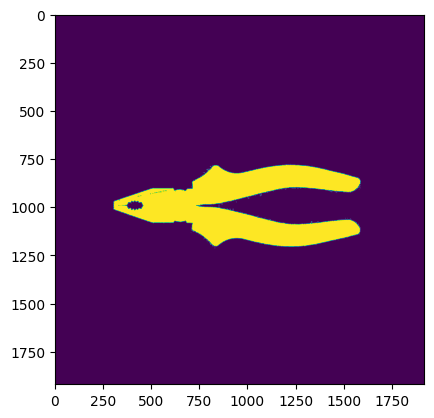

In [121]:
def remove_border_noise(mask, n):
    # Convert the mask to binary
    mask_binary = np.where(mask > 0, 1, 0).astype(np.uint8)

    # Create a structuring element for erosion
    kernel = np.ones((n, n), np.uint8)

    # Perform morphological erosion
    mask_eroded = cv2.erode(mask_binary, kernel, iterations=1)

    # Convert the eroded mask back to the original data type
    mask_eroded = np.where(mask_eroded > 0, 255, 0).astype(np.uint8)

    return mask_eroded

mask_eroded = remove_border_noise(new_mask , 2)     #3
plt.imshow(mask_eroded)

In [122]:
np.sum(mask.astype(bool)), np.sum(mask_eroded.astype(bool))

(282489, 274593)

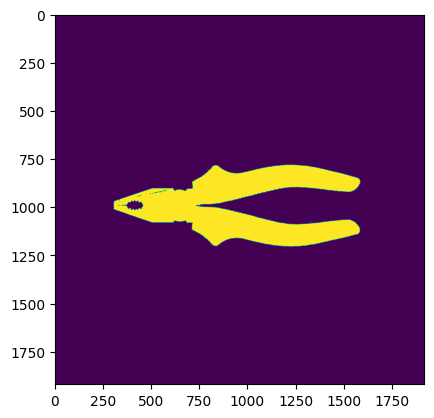

In [123]:
def remove_isolated_dots(mask, kernel_size=3):
    # Define a kernel for erosion
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    # Erode the mask to remove isolated dots
    eroded_mask = cv2.erode(mask, kernel, iterations=1)
    
    return eroded_mask

eroded_mask_new = remove_isolated_dots(mask)
plt.imshow(eroded_mask_new)

In [125]:
np.sum(mask.astype(bool)), np.sum(mask_eroded.astype(bool)), np.sum(eroded_mask_new.astype(bool))

(282489, 274593, 270727)

### Solution

(282489, 280743, <matplotlib.image.AxesImage at 0x12d8a9e0ca0>)

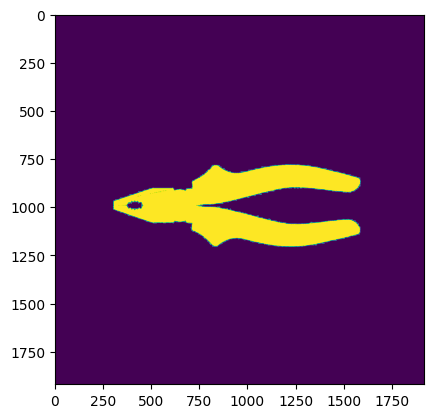

In [124]:
def remove_isolated_regions(mask):
    # Find connected components in the mask
    num_labels, labels = cv2.connectedComponents(mask)

    # Iterate through each label (excluding the background label)
    for label in range(1, num_labels):
        # Create a binary mask for the current connected component
        component_mask = np.uint8(labels == label)

        # If the component mask contains only a small number of pixels,
        # it's likely an isolated region and should be removed
        if np.sum(component_mask) < 30:
            # Set the pixels of the isolated region to 0 (background)
            mask[component_mask > 0] = 0

    return mask

copy = mask.copy()
masks = remove_isolated_regions(copy)
new_mask = exclude_green_pixels(green, masks)
np.sum(mask.astype(bool)), np.sum(masks.astype(bool)), plt.imshow(new_mask)

In [24]:
np.sum(mask_latest.astype(bool)), np.sum(new_mask.astype(bool))

NameError: name 'mask_latest' is not defined

In [25]:
new_mask.shape[0] * new_mask.shape[1], new_mask[new_mask == 255].shape[0]

(2457600, 275077)

In [26]:
mask_copy = new_mask.astype(bool).copy()

................................................Iteration 1.................................................
Total number of pixels in object are 275077.
................................................Iteration 2.................................................
Total number of pixels in object are 274578.
................................................Iteration 3.................................................
Total number of pixels in object are 274570.


(70249950, 275077, <matplotlib.image.AxesImage at 0x1d1b16223e0>)

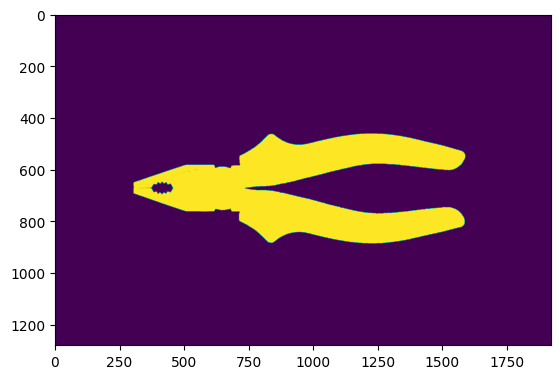

In [27]:
def remove_noise(mask):
    mask = mask.astype(bool)
    
    for itr in range(1, 4):
        print(f"................................................Iteration {itr}.................................................")
        count = 0
        total = np.sum(mask.astype(bool))
        print(f"Total number of pixels in object are {total}.")
        
        for x, y in zip(np.where(mask == True)[0], np.where(mask == True)[1]):                           # Iteration 1 with n = 1, Iteration 2 with n = 2, Iteration 3 with n = 3
            top_bottom = np.sum(mask[x - itr: x, y]) + np.sum(mask[x + 1: x + itr + 1, y])
            left_right = np.sum(mask[x, y - itr : y]) + np.sum(mask[x, y + 1: y + itr + 1])
            if top_bottom == 0 or left_right == 0:             # noise
                mask[x, y] = 0
                #print(top_bottom, left_right)
            #print(x, y)
            #if count % 4000 == 0:
            #    pass
                #print(top_bottom, left_right)
                #print(f"Total = {count}, Percentage = {round((count / total) * 100, 3)}")
            count += 1
    return mask

mask_clean = remove_noise(new_mask)
np.sum(mask), np.sum(new_mask.astype(bool).copy()), plt.imshow(mask_clean)

In [28]:
np.where(mask_copy == True)[0]

array([460, 461, 461, ..., 886, 886, 887], dtype=int64)

In [213]:
count = 0
total = new_mask[new_mask == 255].shape[0]
for x, y in zip(np.where(new_mask == 255)[0], np.where(new_mask == 255)[1]):                           # Iteration 1 with n = 1, Iteration 2 with n = 2, Iteration 3 with n = 3
    top_bottom = np.sum(mask_copy[x - 3 : x, y]) + np.sum(mask_copy[x + 1: x + 4, y])
    left_right = np.sum(mask_copy[x, y - 3 : y]) + np.sum(mask_copy[x, y + 1: y + 4])
    if top_bottom == 0 or left_right == 0:             # noise
        mask_copy[x, y] = 0
        print(top_bottom, left_right)
        #print(top_bottom, left_right)
    #print(x, y)
    count += 1
    if count % 4000 == 0:
        #print(top_bottom, left_right)
        print(f"Total = {count}, Percentage = {round((count / total) * 100, 3)}")

2 0
3 0
3 0
3 0
2 0
3 0
2 0
2 0
2 0
2 0
2 0
2 0
3 0
2 0
3 0
3 0
3 0
2 0
2 0
2 0
3 0
3 0
3 0
Total = 4000, Percentage = 1.454
2 0
2 0
3 0
1 0
2 0
2 0
2 0
3 0
2 0
2 0
Total = 8000, Percentage = 2.908
2 0
2 0
Total = 12000, Percentage = 4.362
3 0
2 0
Total = 16000, Percentage = 5.817
3 0
2 0
Total = 20000, Percentage = 7.271
2 0
Total = 24000, Percentage = 8.725
2 0
Total = 28000, Percentage = 10.179
Total = 32000, Percentage = 11.633
Total = 36000, Percentage = 13.087
Total = 40000, Percentage = 14.541
Total = 44000, Percentage = 15.996
2 0
Total = 48000, Percentage = 17.45
Total = 52000, Percentage = 18.904
Total = 56000, Percentage = 20.358
Total = 60000, Percentage = 21.812
Total = 64000, Percentage = 23.266
Total = 68000, Percentage = 24.72
Total = 72000, Percentage = 26.174
0 3
0 1
Total = 76000, Percentage = 27.629
0 2
0 2
3 0
3 0
0 2
3 0
3 0
Total = 80000, Percentage = 29.083
3 0
3 0
3 0
3 0
2 0
2 0
3 0
3 0
2 0
3 0
Total = 84000, Percentage = 30.537
3 0
2 0
2 0
3 0
3 0
Total = 880

In [29]:
mask_copy = mask_copy.astype(np.uint8) * 255
mask_copy[mask_copy == 255]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [30]:
np.sum(mask_copy.astype(bool))

275077

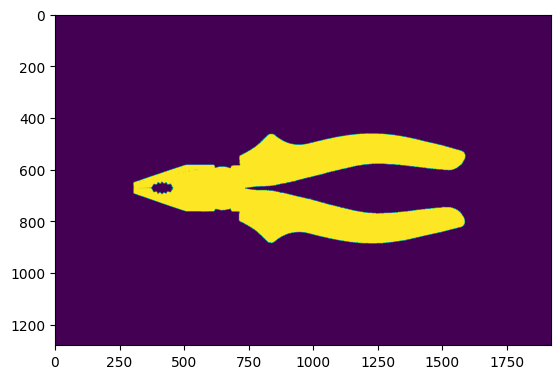

In [31]:
plt.imshow(mask_copy)

In [32]:
np.where(mask == 255)

(array([458, 458, 459, ..., 887, 887, 887], dtype=int64),
 array([1216, 1257, 1206, ..., 1251, 1254, 1283], dtype=int64))

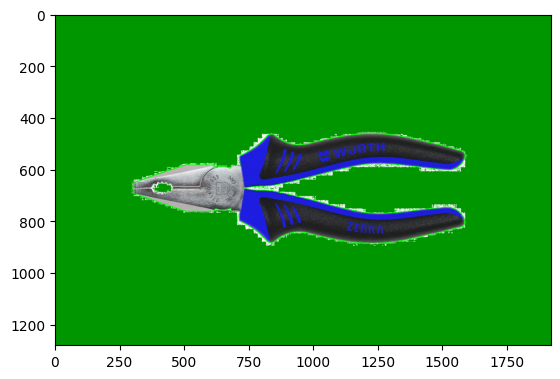

In [33]:
def draw_contours_from_mask(image, mask):
    # Find contours in the provided mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a copy of the original image
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

    return contour_image

maskc = draw_contours_from_mask(image, mask_clean.astype("uint8"))
plt.imshow(maskc)

In [34]:
pix_locs = np.where(mask == 255)
pix_locs

(array([458, 458, 459, ..., 887, 887, 887], dtype=int64),
 array([1216, 1257, 1206, ..., 1251, 1254, 1283], dtype=int64))

In [35]:
for x, y in zip(np.where(mask == 255)[0], np.where(mask == 255)[1]): 
    if mask_clean[x, y] == False:
        right = mask_clean[x + 1, y] == True
        bottom = mask_clean[x, y + 1] == True
        left = mask_clean[x - 1, y] == True
        top = mask_clean[x, y -1] == True
        four_sides_true = (right) and (left) and (bottom) and (top)
        #if four_sides_true:
        print(right, left, bottom, top)
        print(x, y, four_sides_true, mask_clean[x, y], mask[x, y])

False False False False
458 1216 False False 255
False False False False
458 1257 False False 255
False False False False
459 1206 False False 255
False False False False
459 1232 False False 255
False False False False
460 1194 False False 255
False False False False
460 1195 False False 255
False False False False
460 1208 False False 255
False False False False
460 1212 False False 255
False False False False
460 1216 False False 255
False False False False
460 1234 False False 255
False False False False
460 1239 False False 255
False False False False
461 1184 False False 255
True False False False
461 1207 False False 255
True False False False
461 1225 False False 255
True False False False
461 1245 False False 255
False False False False
461 1254 False False 255
True False False False
462 1249 False False 255
False False False False
464 825 False False 255
False False False False
464 1148 False False 255
False False False False
464 1154 False False 255
False False False False
4

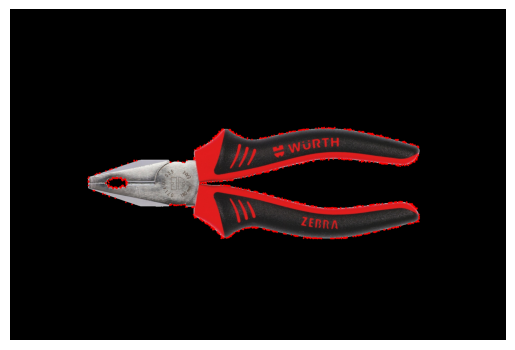

In [36]:
def draw_coordinates_over_image(image, mask, mask_clean):
    # Convert the image to RGB format for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Iterate over the coordinates of white pixels in the mask
    for x, y in zip(*np.where(mask == 255)):
        if mask_clean[x, y] == False:
            cv2.circle(image_rgb, (y, x), 3, (255, 0, 0), -1)  # Draw a blue circle at each coordinate

    # Plot the image with drawn coordinates
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

draw_coordinates_over_image(img, mask, mask_clean)

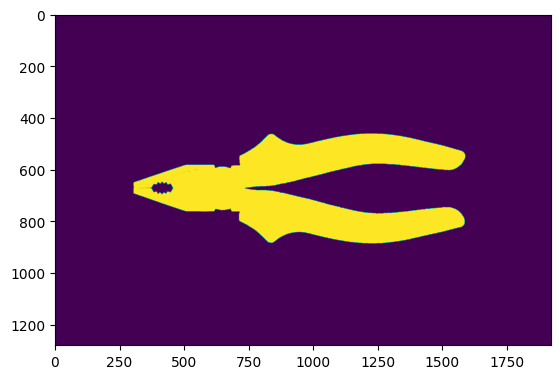

In [37]:
plt.imshow(mask_clean)

In [38]:
mask_3c = convert_binary_to_3c_mask(mask_clean.astype("uint8") * 255)       #new_mask
mask_3c = mask_3c.astype("uint8")
plt.imshow(mask_3c)

NameError: name 'convert_binary_to_3c_mask' is not defined

In [39]:
cv2.imwrite(os.path.join(folder, "141874_mask_latest_new.png"), mask_3c), os.path.join(folder, "141874_mask_new.jpg")

NameError: name 'mask_3c' is not defined

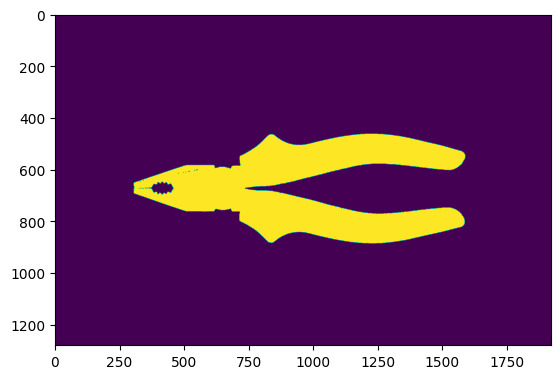

In [40]:
mask_eroded = remove_border_noise(mask_clean , 2)     #3
plt.imshow(mask_eroded)

In [41]:
np.sum(mask_clean), np.sum(mask_eroded.astype(bool))

(274570, 271556)

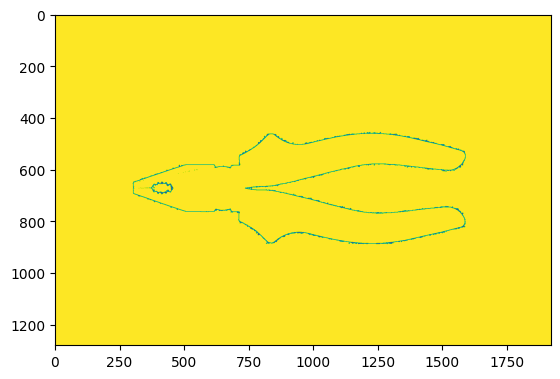

In [42]:
def fill_isolated_dots(mask, kernel_size=3):
    # Define a kernel for dilation
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    # Dilate the mask to fill isolated dots
    dilated_mask = cv2.dilate(mask, kernel, iterations=1)
    
    # Invert the dilated mask
    inverted_mask = cv2.bitwise_not(dilated_mask)
    
    # Combine the inverted mask with the original mask to fill isolated dots based on surrounding masked region
    filled_mask = cv2.bitwise_or(mask, inverted_mask)
    
    return filled_mask

filled_mask = fill_isolated_dots(eroded_mask_new)
filled_mask = fill_isolated_dots(mask)
plt.imshow(filled_mask)

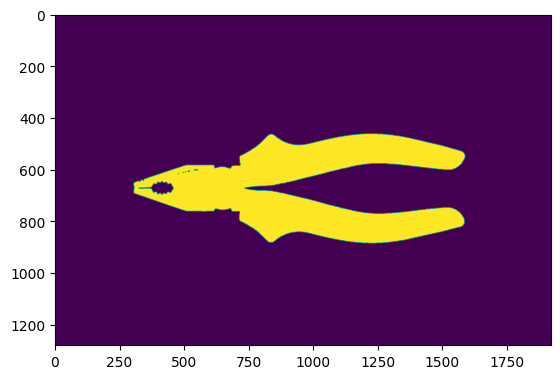

In [43]:
def smooth_mask(mask, kernel_size=5, iterations=1):
    # Apply erosion followed by dilation to remove noise
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    smoothed_mask = cv2.erode(mask, kernel, iterations=iterations)
    smoothed_mask = cv2.dilate(smoothed_mask, kernel, iterations=iterations)
    
    # Apply Gaussian blur to further smooth the mask
    smoothed_mask = cv2.GaussianBlur(smoothed_mask, (kernel_size, kernel_size), 0)
    
    return smoothed_mask


smoothed_mask = smooth_mask(eroded_mask_new)
plt.imshow(smoothed_mask)

In [44]:
mask[mask > 0]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [45]:
np.where([mask > 0])

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([458, 458, 459, ..., 887, 887, 887], dtype=int64),
 array([1216, 1257, 1206, ..., 1251, 1254, 1283], dtype=int64))

In [46]:
mask[459, 1206]

255

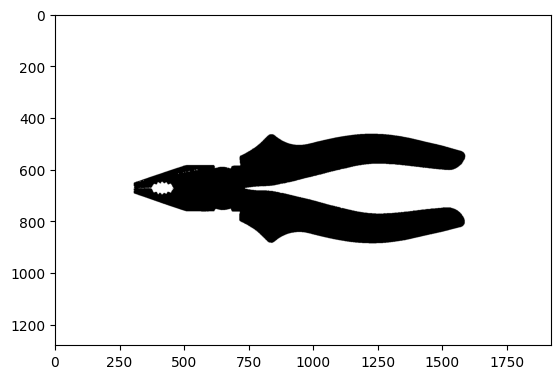

In [47]:
def convert_binary_to_3c_mask(binary_mask):
    # Ensure binary_mask is in the range [0, 255]
    binary_mask = np.clip(binary_mask, 0, 255)
    
    # Convert the binary mask into a black and white mask
    bw_mask = binary_mask / 255

    # Invert the mask if needed (optional)
    bw_mask = 1 - bw_mask
    bw_mask = bw_mask * 255

    # Convert the 2D mask to a 3-channel mask
    bw_mask_3channel = np.repeat(bw_mask[:, :, np.newaxis], 3, axis=2)

    return bw_mask_3channel

mask_3c = convert_binary_to_3c_mask(mask_eroded)
mask_3c = mask_3c.astype("uint8")
plt.imshow(mask_3c)

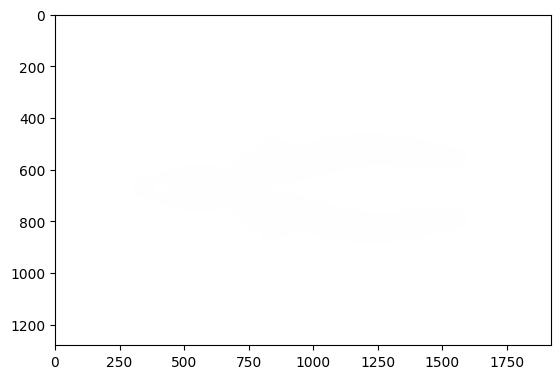

In [48]:
mask_3c = convert_binary_to_3c_mask(mask_copy.astype("uint8") * 255)       #new_mask
mask_3c = mask_3c.astype("uint8")
plt.imshow(mask_3c)

In [49]:
def generate_mask3c(image_path):
    image = cv2.imread(image_path)    
    img= invert_image(image)
    green = invert_image_green(image, 1, 150)
    plt.imshow(green)
    angle, mask = find_object_mask(green)
    #new_mask = exclude_green_pixels(green, mask)
    mask_i = remove_isolated_regions(mask)
    mask_ii = exclude_green_pixels(green, mask_i)
    mask_clean = remove_noise(mask_ii)
    mask_copy = mask_clean.astype(np.uint8) * 255
    mask_3c = convert_binary_to_3c_mask(mask_clean.astype("uint8") * 255)       #new_mask
    mask_3c = mask_3c.astype("uint8")
    cv2.imwrite(os.path.join(folder, image_path.replace(image_path[-4], "_mask" + image_path[-4])), mask_3c)

................................................Iteration 1.................................................
Total number of pixels in object are 280795.
................................................Iteration 2.................................................
Total number of pixels in object are 278461.
................................................Iteration 3.................................................
Total number of pixels in object are 278331.


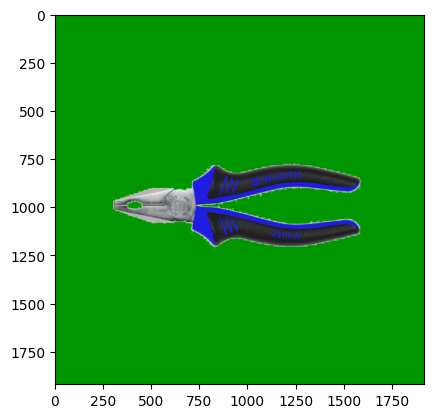

In [58]:
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\test_set\classes\141874\141874.jpg"
mask3c = generate_mask3c(image_path)

In [51]:
folder, image_path.replace(image_path[-4], "_mask" + image_path[-4])

('C:\\Users\\wn00217454\\computer_vision\\thesis\\data\\datasets\\generated_datasets\\diffusion_models\\to_use\\masks',
 'C:\\Users\\wn00217454\\computer_vision\\thesis\\data\\datasets\\test_set\\32098732_mask.jpg')

In [52]:
image_path[-4]

'.'

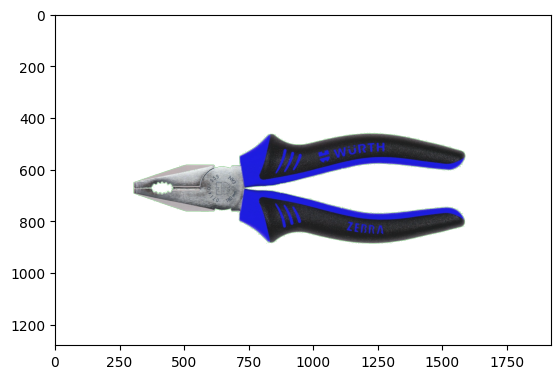

In [53]:
def add_alpha_channel(image, mask):
    # Ensure mask is binary (0 or 255)
    mask = np.where(mask > 0, 255, 0).astype(np.uint8)

    # Create an alpha channel from the mask
    alpha_channel = np.expand_dims(mask, axis=2)

    # Concatenate the alpha channel with the image
    image_with_alpha = np.concatenate((image, alpha_channel), axis=2)

    return image_with_alpha


image_alpha = add_alpha_channel(green, mask)
plt.imshow(image_alpha)

In [54]:
cv2.imwrite(os.path.join(folder, "141874_alpha_channel.png"), image_alpha)

True

In [55]:
mask_3c[500:750, 600:800][0][:10]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [56]:
mask_3c.shape, mask_3c.dtype

((1280, 1920, 3), dtype('uint8'))

In [57]:
cv2.imwrite(os.path.join(folder, "141874_mask_latestec.png"), mask_3c), os.path.join(folder, "141874_mask_new.jpg")

(True,
 'C:\\Users\\wn00217454\\computer_vision\\thesis\\data\\datasets\\generated_datasets\\diffusion_models\\to_use\\masks\\141874_mask_new.jpg')